# The rz_lib library



$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

To develop the **Benchmark Test Case** for **QPE** we have developed the
**QPE.rz_library** Python module that has all mandatory functions for computing eigenvalues of a  $Rz^{\otimes n} (\vec{\theta})$ operator theoretically and using *myqlm* simulation library. In this notebook we explain the **QPE** for the $Rz^{\otimes n} (\vec{\theta})$ and shows how to use the **QPE.rz_library** module.


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../../')
%matplotlib inline

## 0. The QPU

To simulate the quantum circuits generated by the functions presented in this notebook a configured myQLM (or QLM) **Quantum Process Unit (QPU)** is mandatory. The **QPU** can execute an ideal simulation or can simulate the quantum circuits under a noisy hardware model (noisy simulation). To easily deal with these 2 kinds of simulations the  *select_qpu* function from **tnbs.qpu.select_qpu** was developed. The input of this function is a Python dictionary that allows to the user configure easily a **QPU**.

In the present notebook, only ideal simulation is used. Please refer to the **03_NoisySimulation_BTC_04_QPE.ipynb** notebook for configuring noisy models and the corresponding noisy **QPU**s


In [ ]:
sys.path.append("../../../")
from qpu.select_qpu import select_qpu

The minimum Python dictionary for configuring an ideal **QPU** is presented in the following cell. In this case, the user only has to provide a value to the *qpu_type* key. Depending on the type of simulator desired the following strings should be provided:

* *qlmass_linalg*: to use the **LinAlg Quantum Learning Machine (QLM)** algebra simulator. In this case, the computation will be sent to the **QLM** by using the  Qaptiva QLM as a Service.
* *qlmass_mps*: to use **MPS QLM** simulator. In this case, the computation will be sent to the **QLM** by using the  Qaptiva QLM as a Service.
* *python*: to use the PyLinalg algebra simulator.
* *c*: to use the CLinalg alegbra simulator.
* *linalg*: to use the **LinAlg QLM**. In this case, the user should be inside a **EVIDEN QLM**
* *mps*: to use the **MPS QLM** simulator. In this case, the user should be inside a **EVIDEN QLM**

In [ ]:
# List with the strings that should be provided for an ideal QPU
ideal_qpus = ["c", "python", "linalg", "mps", "qlmass_linalg", "qlmass_mps"]
qpu_config = {
    "qpu_type": ideal_qpus[0], 
}
qpu = select_qpu(qpu_config)

## 1. Quantum Phase Estimation Theory

Let a $n$ qubit unitary operator $\mathcal{Q}$ and let $\ket{\Psi_j}_n$ an eigenstate of operator $\mathcal{Q}$. The eigenvalue of eigenstate $\ket{\Psi_j}_n$ for $\mathcal{Q}$ will be:

$$\mathcal{Q}\ket{\Psi_j} = e^{2\pi i \lambda_j} \ket{\Psi_j}$$

The Quantum Phase Estimation algorithm, **QPE**, allow us, given an operator $\mathcal{Q}$ and an eigenstate $\ket{\Psi_j}_n$, compute the correspondent eigenvalue $\lambda_j$ using following circuit:

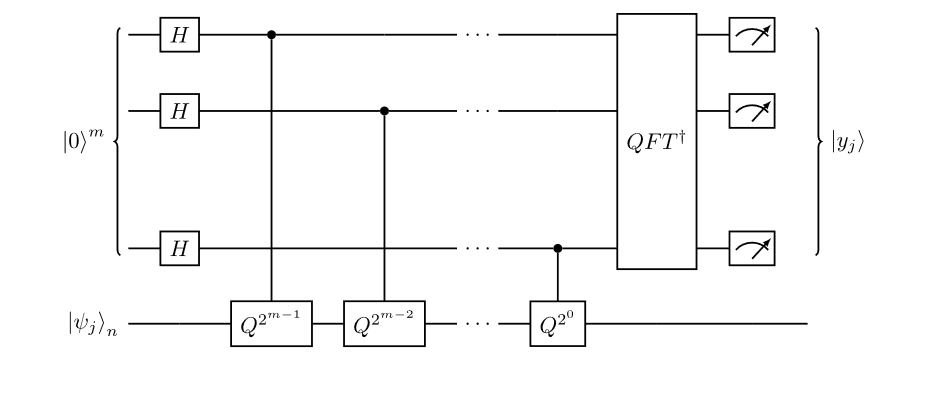

As can be seen, the **QPE** circuit uses 2 types of register: $m$ registers that apply the controlled Unitary operator $\mathcal{Q}$ over the $n$ registers initialized to the eigenstate $\ket{\Psi_j}_n$ of $\mathcal{Q}$.


The measurement $y_j$ can be related with $\lambda_j$ by:

$$\lambda_j = \frac{y_j}{2^m}$$

It can be shown that if the eigenvalue $\lambda_j$ can be mapped to  $\frac{y_j}{2^m}$ then the probability of getting the correct eigenvalue is 100%. If this is not possible then it can be shown that the measured $\lambda^{Meas}_j$ have an error concerning the true value $\lambda^{True}_j$ of:

$$|\lambda^{Meas}_j - \lambda^{True}_j| \leq \frac{1}{2^m}$$

with a probability higher than $80\%$. 

The $n$ qubits register can be initialized to a linear combination of different eigenstates of the operator $\mathcal{Q}$:

$$\ket{\Psi_0}_n = \sum_{j=0} ^{l} a_l \ket{\Psi_l}_n$$

In this case, the **QPE** algorithm will provide the eigenvalues of the different eigenstates presented in the linear combination. The probability of obtaining the different eigenstates will depend on the coefficient $a_l$


## 2. Quantum Phase Estimation for $Rz^{\otimes n} (\vec{\theta})$

To test the performance of a quantum computing system for executing the **QPE**, we are going to compute the eigenvalues of the Kronecker product of $R_z$ gates, $Rz^{\otimes n} (\vec{\theta})$. 

The reasons for selecting the $Rz^{\otimes n} (\vec{\theta})$ operator as a Benchmark Test Case are:

1. The eigenvectors of the $Rz^{\otimes n} (\vec{\theta})$ are the elements of the computational basis.
2. The eigenvalues of the $Rz^{\otimes n} (\vec{\theta})$ are computable in a very easy way.

Do some maths to justify these reasons. 


### 1 qubit 

The $R_z(\theta)$ gate have the following matrix representation:


$$
R_z (\theta) = 
\begin{equation}
    \begin{pmatrix}
    e^{-i\frac{\theta}{2}} & 0\\
    0 & e^{i\frac{\theta}{2}}
    \end{pmatrix}
\end{equation}
$$

A more suitable formulation is using Dirac notation:

$$R_z = \ket{0}\bra{0} e^{-i\frac{\theta}{2}} + \ket{1}\bra{1} e^{i\frac{\theta}{2}}$$

For this operator the the eigenvectors are $\ket{0}$ with eigenvalue $e^{-i\frac{\theta}{2}}$ and $\ket{1}$ with eigenvalue $e^{i\frac{\theta}{2}}$.

If we use the **QPE** with the $R_z$ operator then the following equality should be taken into account for computing the correct eigenvalues:

$$2 \pi \lambda = \frac{\theta}{2}$$


### 2 qubit 

Now we are going to compute the correspondent Kronecker product for 2 qubits $R_z(\theta_1) \otimes R_z(\theta_2)$:

$$R_z(\theta_1) \otimes R_z(\theta_2) = \ket{00}\bra{00} e^{-i\frac{\theta_1 + \theta_2}{2}} + \ket{01}\bra{01} e^{-i\frac{\theta_1 - \theta_2}{2}} + \ket{10}\bra{10} e^{-i\frac{-\theta_1 + \theta_2}{2}} + \ket{11}\bra{11} e^{-i\frac{-\theta_1 - \theta_2}{2}}$$

As can be seen the eigenvectors of the $R_z(\theta_1) \otimes R_z(\theta_2)$ operator are the elements of the computational basis.

**Be aware** that if we want to use the **QPE** for this operator then:

* $2\pi \lambda_{\ket{00}} = - \frac{\theta_1 + \theta_2}{2}$
* $2\pi \lambda_{\ket{01}} = - \frac{\theta_1 - \theta_2}{2}$
* $2\pi \lambda_{\ket{10}} = - \frac{-\theta_1 + \theta_2}{2}$
* $2\pi \lambda_{\ket{11}} =  \frac{\theta_1 + \theta_2}{2}$


### 3 qubit 


For a 3 qbit operator: $R_z(\theta_1) \otimes R_z(\theta_2) \otimes R_z(\theta_3)$ the operator is:

$$R_z(\theta_1) \otimes R_z(\theta_2) \otimes R_z(\theta_3)= \ket{000}\bra{000} e^{-i\frac{\theta_1 + \theta_2 + \theta_3}{2}} + \ket{001}\bra{001} e^{-i\frac{\theta_1 + \theta_2 - \theta_3}{2}} + \ket{010}\bra{010} e^{-i\frac{\theta_1 -  \theta_2 + \theta_3}{2}} + \ket{011}\bra{011} e^{-i\frac{\theta_1 -  \theta_2 - \theta_3}{2}} + \ket{100}\bra{100} e^{-i\frac{-\theta_1 + \theta_2 + \theta_3}{2}} + \ket{101}\bra{101} e^{-i\frac{-\theta_1 + \theta_2 - \theta_3}{2}} + \ket{110}\bra{110} e^{-i\frac{-\theta_1 - \theta_2 + \theta_3}{2}} +\ket{111}\bra{111} e^{-i\frac{-\theta_1 - \theta_2 - \theta_3}{2}} $$


Again the eigenvectors are the elements of the computational basis. We have to **be aware** when using  **QPE**:

* $2\pi \lambda_{\ket{ijk}} = - \frac{(-1)^i\theta_1 + (-1)^j\theta_2 + (-1)^k\theta_2}{2}$


### n qubit 


This can be easily generalizable for a $n$ qbits Kronecker product: $R_z^{\otimes n} (\vec{\theta})$.

Additionally, the eigenvalues for each eigenvector have an easy computation recipe: for a system with $n$ qubits the eigenvalue for an eigenstate $\ket{i_0i_1i_2 \cdots i_n}$, with $i_j=\{0,1\}$, of a $Rz^{\otimes n} (\vec{\theta})$ operator have following eigenvalue:

$$2\pi \lambda_{\ket{i_0, i_1, \cdots , i_n}} = - \frac{\sum_{j=0}^{n} (-1)^{i_j} \theta_j}{2}$$

**BE AWARE**

The $\lambda_{\ket{i_0, i_1, \cdots , i_n}}$ presented here will be the same that $\lambda_j$ presented in the **Quantum Phase Estimation** section.

**IMPORTANT NOTE**

*We are interested in getting all the possible eigenvalues of the Kronecker product $R_z^{\otimes n} (\vec{\theta})$. So, the $n$ qubits register will be initialized to the equiprobable distribution of all the elements of the computational basis (by applying a Haddamard gate to all the $n$ qubits of the register)*

## 3. The rz_lib

The **rz_library** python module, inside **QPE** package, has all functions needed to compute, theoretically and using **QPE** algorithm (simulated using Atos myqlm), the eigenvalues of a generic $R_z^{\otimes n} (\vec{\theta})$.

### 3.1. Theoretical Eigenvalues

The *rz_eigv* function from **QPE.rz_lib** module allows to compute the complete eigenvalues of a generic $R_z^{\otimes n} (\vec{\theta})$ operator for an input list of angles. To understand the package we are going to use two types of lists of angles:

1. A list with the same angle for all the qubits, set to $\frac{\pi}{2}$.
2. A list of different random angles

In [ ]:
from QPE.rz_lib import rz_eigv

In [ ]:
n_qbits = 7
#Angle pi/2
theta_same = [np.pi / 2.0 for i in range(n_qbits)]
print('Same Angles: {}'.format(theta_same))
theta_diff = [np.pi * np.random.random() for i in range(n_qbits)]
print('Different Angles: {}'.format(theta_diff))

Now we ca use the **rz_eigv** function for computing the desired eigenvalues.

In [ ]:
eigv_theta_same = rz_eigv(theta_same)
eigv_theta_diff = rz_eigv(theta_diff)

Depending of the angles of the $R_z^{\otimes n}$ operator the eigenvalues can be degenerated!

In [ ]:
non_repeated = set(eigv_theta_same['Eigenvalues'])
print("Number of eigenvalues: {}. Not repeated ones: {}".format(len(eigv_theta_same), len(non_repeated)))

In [ ]:
non_repeated = set(eigv_theta_diff['Eigenvalues'])
print("Number of eigenvalues: {}. Not repeated ones: {}".format(len(eigv_theta_diff), len(non_repeated)))

### 3.2 Computing the theoretical histogram

Once the theoretical eigenvalues are found we need to create the correspondent histogram of the eigenvalues between $[0, 1]$ and with fixed discretization that will be given by the number of auxiliary qubits that will be used for computing the **QPE** (the $m$ qubit register in the **QPE** showed at the beginning of the notebook). This should be done for a direct comparison between the theoretical results and the results of the **QPE**.


For computing the corresponding histogram the *make_histogram* from **QPE.rz_library** can be used. The inputs will be the theoretical computed eigenvalues and a discretization parameter (that must be equal to the $m$ that we are going to use for the **QPE**)

In [ ]:
from QPE.rz_lib import make_histogram

In [ ]:
auxiliar_qbuits = 10
hist_theta_same = make_histogram(
    eigv_theta_same['Eigenvalues'], auxiliar_qbuits)
hist_theta_diff = make_histogram(
    eigv_theta_diff['Eigenvalues'], auxiliar_qbuits)
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'], 'o-')
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'], 'o-')
plt.xlabel(r'$\lambda$')
plt.xlabel('Probability')
plt.legend(['Same angle', 'Different Angles'])

### 3.3 QPE eigenvalue computation of  $R_z^{\otimes n} (\vec{\theta})$ operator

Once we have the vector with the angles, $\vec{\theta}$, we can use the **QPE** algorithm to measured the corresponding eigenvalues.


The **qpe_rz_qlm** function from **QPE.rz_lib** can be used for this. The inputs for this function are:

* angles: list with the angles $\vec{\theta}$.
* auxiliar_qbits_number for using the **QPE** ($m$ in the **QPE** figure).
* shots: the number of shots the complete circuit will be measured.
* qpu: **QPU** used for solving the **QPE** circuit (a myQLM or a QLM one)

In [ ]:
from QPE.rz_lib import qpe_rz_qlm

#### Computing the number of shots.

One mandatory input for the *qpe_rz_qlm* is the number of shots the **QPE** circuit should be measured. If 0 is provided then an exact simulation will be done. To replicate the behaviour of a quantum device the shots should be an integer number (higher than 0).

For the **QPE** benchmark test case we want to set the **shots** to measure each possible eigenvalue a enough number of times: **1000**. The main problem is, as we have shown before, that the eigenvalues can be degenerated and those eigenvalues with higher degeneracy will be obtained more frequently. To have at least **1000** for each possible eigenvalue the following strategy will be used:

1. Compute the probability of getting the lowest degeneracy eigenvalue from all the possible theoretical eigenvalues: $p_{lde}$.
2. Setting the number of shots to:
$$\text{shots} = \lceil\frac{1000}{0.81 * p_{lde}}\rceil$$

This computation can be done with the *computing_shots* function from **QPE.rz_lib**

In [ ]:
from QPE.rz_lib import computing_shots

In [ ]:
same_shots = computing_shots(eigv_theta_same)
print("Number of shots for same angles: {}".format(same_shots))
diff_shots = computing_shots(eigv_theta_diff)
print("Number of shots for different angles: {}".format(diff_shots))

Now we can use the *qpe_rz_qlm* for executing the **QPE**. This function returns:

* **results**: pandas DataFrame with the distribution of the eigenvalues with a bin discretization of $2^m$. The DataFrame has the following columns:
    * *lambda* : bin discretization for eigenvalues based on the discretization input
    * *Probability*: the probability of finding any eigenvalue inside of the corresponding lambda bin
* **qft_pe**: Python object. An object from the class *CQPE* from **QPE.qpe** module. This class creates and executes the *QPE* algorithm by providing a unitary operator and an eigenstate. The following attributtes of the object can be of interest:
    * *circuit*: The QPE circuit 
    * *q_gate*: the unitary operator circuit
    * *initial_state*: eigenvector (or linear combination of eigenvalues) of the unitary operator.

In [ ]:
auxiliar_qbuits = 10
# QPE dstribution
pdf_qlm_rz_same, qpe_object_ = qpe_rz_qlm(
    theta_same, 
    auxiliar_qbits_number=auxiliar_qbuits, 
    shots=same_shots,
    qpu=qpu
)

In [ ]:
# Pandas Data Frame with the probability distribution of eigenvalues
pdf_qlm_rz_same

We can access to the **QPE** circuit using the *circuit* attribute of the **QPE.qpe** object (*qpe_object_*)

In [ ]:
# QPE circuit: attribute circuit of the object
c = qpe_object_.circuit
%qatdisplay c --svg

Additionally, we can access the unitary operator target of the **QPE** algorithm (in our case this is the $R_z^{\otimes n} (\vec{\theta})$  operator) by the attribute **q_gate**

In [ ]:
unitary_operator = qpe_object_.q_gate
%qatdisplay unitary_operator --depth --svg

We can acces to the initialization of the $n$ qubits register of the **QPE** by using the attribute *initial_state*. For the $R_z^{\otimes n} (\vec{\theta})$  operator this will be a equally weigthed linear combination of the computational basis elements (this is apply a Haddamard gate to each of the $n$ qubits register)

In [ ]:
initial_state = qpe_object_.initial_state
%qatdisplay initial_state --svg

The resulting DataFrame (*pdf_qlm_rz_same*) with the *quantum* obtained eigenvalue distribution, can be compared directly with the theoretical eigenvalue histogram computed before (*hist_theta_same*).

In [ ]:
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'], 'o-')
plt.plot(pdf_qlm_rz_same['lambda'], pdf_qlm_rz_same['Probability'], 'o-')

In general, for comparing probability distributions the cumulative distribution is used:


In [ ]:
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'].cumsum(), 'o-')
plt.plot(pdf_qlm_rz_same['lambda'], pdf_qlm_rz_same['Probability'].cumsum(), 'o-')

Now we can do the same for the  $R_z^{\otimes n} (\vec{\theta})$  operator where the $\vec{\theta}$ were all different

In [ ]:
#Now for different angles
auxiliar_qbuits = 10
# QPE dstribution
pdf_qlm_rz_diff, qpe_object = qpe_rz_qlm(
    theta_diff, 
    auxiliar_qbits_number=auxiliar_qbuits, 
    shots=diff_shots, 
    qpu=qpu
)

Now the unitary operator have different angles for each qubit:

In [ ]:
unitary = qpe_object.q_gate
%qatdisplay unitary --svg --depth

The resulting DataFrame (*pdf_qlm_rz_diff*) with the *quantum* obtained eigenvalue distribution, should be compared directly with the theoretical eigenvalue histogram computed before (*pdf_qlm_rz_diff*).

In [ ]:
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'], 'o-')
plt.plot(pdf_qlm_rz_diff['lambda'], pdf_qlm_rz_diff['Probability'], 'o-')

In general, for comparing probability distributions their cumulative distribution are used:


In [ ]:
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'].cumsum(), 'o-')
plt.plot(pdf_qlm_rz_diff['lambda'], pdf_qlm_rz_diff['Probability'].cumsum(), 'o-')

### Times each eigenstate is measured

We have fixed the number of shots, for each tested example, for obtaining each possible eigenvalue **1000** times. Now we can test if this has occurred or not:

For the case where all the angles of the $R_z^{\otimes n} (\vec{\theta})$ operator were the same:

In [ ]:
# As can be seen each different eigenvalue is measured near 1000 times
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'] * same_shots , 'o-')
plt.xlabel('Eigenvalue')
plt.ylabel('Counts')

For the case where all the angles of the $R_z^{\otimes n} (\vec{\theta})$ operator were different:

In this case it is more difficult to see if each eigenvalue was measured near of 1000 times. So we need to test it explicitely

In [ ]:
for i in set(eigv_theta_diff['Eigenvalues']):
    pdf = pdf_qlm_rz_diff
    # We compute the error between the measured eigenvalue 
    # and the theoretical one
    pdf['Error'] = np.abs(pdf['lambda'] - i)
    # We test the number of measures whose error is lower than 
    # discretization  precision
    print(
        sum(pdf[pdf['Error'] < 2/(2**auxiliar_qbuits)]['Probability'])\
        * diff_shots
    )

As can be seen we have near 1000 measures that verify the error condition